<img src="http://www.utfpr.edu.br/curitiba/estrutura-universitaria/diretorias/dirppg/programas/cpgei/escola-de-fotonica/escola-de-fotonica-2013/UTFPRCT.png/image_preview"/>

# <center> Máquina de Lavar Fuzzy</center>
----

Considere o problema da Máquina de Lavar com Controle Fuzzy.  
Neste problema temos duas variáveis de entrada: 

$X_1$: Grau de sujeira da roupa(sujeiras)  
$X_2$: Manchas presentes na roupa(manchas)  

e uma variável de saída:  

$Y$: Tempo de lavagem da máquina  

Suponha um sistema fuzzy (modelo MAMDANI definido por um especialista para resolver este problema) composto por uma base de dados, base de regras e mecanismo de inferência conforme mostrado a seguir:  


## Base de dados  

Na base de dados, as variáveis lingüísticas $X_1$, $X_2$ e $Y$ possuem os seguintes conjuntos de termos lingüísticos:  
$$T(X_1) = {PS(pequena\_sujeira), MS(média\_sujeira), GS(grande\_sujeira)} $$
$$T(X_2) = {SM(sem\_mancha), MM(média\_mancha), GM(grande\_mancha)} $$
$$T(Y) = {MC(muito\_curto), C(curto), M(medio), L(longo), ML(muito\_longo)} $$  

A regra semântica Μ, definida pelo especialista, associa cada rótulo dos termos nos conjuntos T às funções de pertinência mostradas a seguir:


<table>
    <tr>
        <td>
            <center>Partição do Universo $X_1$ (Sujeira)</center>
        </td>
        <td>
            <center>Partição do Universo $X_2$ (Manchas)</center>
        </td>
    </tr>
    <tr>
        <td>
            ![sujeira](img/sujeira.png)
        </td>
        <td>
            ![mancha](img/mancha.png)
        </td>
    </tr>
    <tr>
        <td>
            <center>Partição do Universo $Y$ (Tempo)</center>
        </td>
    </tr>
    <tr>
        <td>
            ![tempo](img/tempo.png)
        </td>
    </tr>
</table>


## Base de Regras

A base de regras envolvendo as entradas (grau de sujeira e manchas na roupa) e a saída (tempo de lavagem) é dada por:  


|      |      |      |      |
|------|------|------|------|
|      |**SM**|**MM**|**GM**|
|**PS**|MC    |M     |L     |
|**MS**|C     |M     |L     |
|**G**S|M     |L     |ML    |  

O que define o seguinte conjunto de regras fuzzy:  
**R1:** Se $X_1$ é **PS** E $X_2$ é **SM** então $Y$ é **MC**  
.  
.  
.  
**R9:** Se $X_1$ é **GS** E $X_2$ é **GM** então $Y$ é **ML**




## Implementações

Para as seguintes implementações iremos primeiramente importar todas as bibliotecas necessárias e depois seguir para a implementação de cada mecanismo de raciocínio.  

As bibliotecas necessárias serão:  
* Numpy: para realizar operações matemáticas de forma mais performática
* ScikitFuzzy: que dispõe das funções básicas de fuzzy implementadas.
* MatplotLib: para plotar em gráficos os resultados bem como os conjuntos fuzzy
* Pandas: para leitura do csv

In [1]:
#Forçando a instalação das bibliotecas
!pip install numpy
!pip install matplotlib
!pip install scikit-fuzzy
!pip install pandas

#Importando as bibliotecas para utilização
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import pandas as pd 

### Mecanismo de raciocício

<div style="background-color:#fff59d; width:50%; margin-left:20%">
- **Composição sup-t:** sup-min (matching = possibilidade)  
- **Agregação dos Antecedentes:** Min  
- **Semântica das Regras (ou implicação:** Min ( regra de Mamdani)  
- **Agregação das Regras:** Max  
- **Método de Defuzificação:** Centroide  
<div>


#### Implementando a Base de dados
Nesta etapa iremos: 
1. Criar as variáveis fuzzy(sujeira, mancha e tempo)
2. Definir o universo de discurso de cada 
3. Definir as variáveis linguísticas de cada
4. Gerar as funções de pertinência relacionado a cada variável linguística

In [2]:
'''
Criando as variáveis fuzzy e definindo o universo de discurso.
A função np.arange gera um vetor com base nos parâmetros (inicio,fim,passo)
'''
x1 = np.arange(0,101,0.01) #sujeira
x2 = np.arange(0,101,0.01) #mancha
y = np.arange(0,51,0.001)   #tempo

In [3]:
len(x1)

10100

In [4]:
'''
Criando as funções de pertinência
A função fuzz.trimf gera a função de pertinencia triangular(array) utilizando como paramentros (variavel,[inicio, meio, fim])
'''

x1_ps = fuzz.trimf(x1,[0,0,50])    #pequena_suejeira
x1_ms = fuzz.trimf(x1,[0,50,100])  #media_sujeira
x1_gs = fuzz.trimf(x1,[50,100,100]) #grande_sujeira

x2_sm = fuzz.trimf(x2,[0,0,50])    #sem_mancha
x2_mm = fuzz.trimf(x2,[0,50,100])  #media_mancha
x2_gm = fuzz.trimf(x2,[50,100,100]) #grande_mancha

y_mc = fuzz.trimf(y,[0,0,10])      #muito_curto
y_c  = fuzz.trimf(y,[0,10,25])     #curto
y_m  = fuzz.trimf(y,[10,25,40])    #medio
y_l  = fuzz.trimf(y,[25,40,50])    #longo
y_ml = fuzz.trimf(y,[40,50,50])    #muito_longo

In [5]:
len(x1_ps)

10100

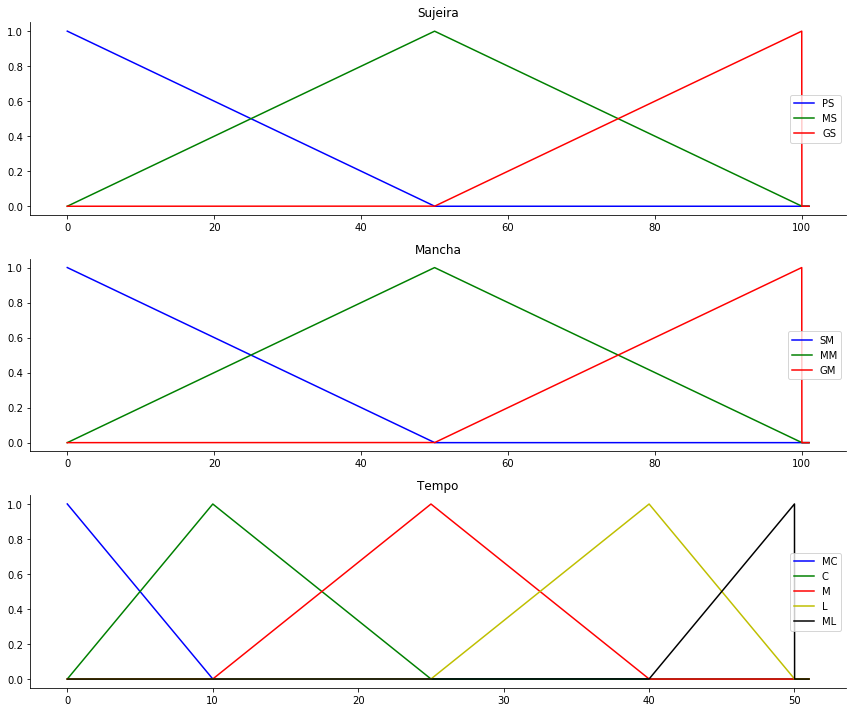

In [6]:
'''
Visualizando as funções geradas
'''
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(12, 10))

ax0.plot(x1, x1_ps, 'b', linewidth=1.5, label='PS')
ax0.plot(x1, x1_ms, 'g', linewidth=1.5, label='MS')
ax0.plot(x1, x1_gs, 'r', linewidth=1.5, label='GS')
ax0.set_title('Sujeira')
ax0.legend(loc=5)

ax1.plot(x2, x2_sm, 'b', linewidth=1.5, label='SM')
ax1.plot(x2, x2_mm, 'g', linewidth=1.5, label='MM')
ax1.plot(x2, x2_gm, 'r', linewidth=1.5, label='GM')
ax1.set_title('Mancha')
ax1.legend(loc=5)

ax2.plot(y, y_mc, 'b', linewidth=1.5, label='MC')
ax2.plot(y, y_c, 'g', linewidth=1.5, label='C')
ax2.plot(y, y_m, 'r', linewidth=1.5, label='M')
ax2.plot(y, y_l, 'y', linewidth=1.5, label='L')
ax2.plot(y, y_ml, 'k', linewidth=1.5, label='ML')
ax2.set_title('Tempo')
ax2.legend(loc=5)



# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

#### Implementando a Base de Regras
Para implementar a base de regras teremos que:

1. Dado um valor de entrada é feita a **Ativação** em cada função de pertinência. Por exemplo: para o valor de entrada $X_1 = 40$ temos que percorrer todas as funções(PS,MS e GS) e descobrir o quanto ativa em cada uma delas  
2. Com base na tabela de regras é feita a **Agregação dos Antecedentes**  
3. Com o valor da Agregação dos Antecedentes é feita a **Semântica da Regra(implicação)**, ou seja a ativação dos antecendentes na variavel do consequente (o quanto sujeira e mancha influenciam em tempo)  
4. Com todas as implicações feitas passa-se para a **Agregação das Regras** onde junta-se as ativações dos consequentes em um conjunto fuzzy resultante  
5. Por último é feita a **Defuzzificação** do conjunto fuzzy resultante de modo obter um valor escalar.


<div style="background-color:#81D4FA; width:80%; margin-left:5%">
    <p style="padding:10px">
        Para facilitar a indexação dos valores(que serão reutilizados nos passos citados acima), serão definidas constantes para as variáveis linguísticas e estas constantes serão indexes de mapas(dicionários em python). Isto é apenas um detalhe de implementação para facilitar o manejo dos valores e a reusabilidade. 
    </p>
</div>

In [7]:
'''
PASSO 0
Definição das constantes
'''

X1_PS = "pequena_suejeira"
X1_MS = "media_sujeira"
X1_GS = "grande_sujeira"

X2_SM = "sem_mancha"
X2_MM = "media_mancha"
X2_GM = "grande_mancha"

Y_MC = "tempo_muito_curto"
Y_C  = "tempo_curto"
Y_M  = "tempo_medio"
Y_L  = "tempo_longo"
Y_ML = "tempo_muito_longo"

In [8]:
'''
PASSO 1
Essa função retorna os valores de  ativação de cada uma das funções de pertinência em um dict/map do tipo:
{'grande_mancha': 0.0,
 'grande_sujeira': 0.0,
 'media_mancha': 0.2,
 'media_sujeira': 0.2,
 'pequena_suejeira': 0.8,
 'sem_mancha': 0.8}
 
Para isso utiliza-se a fuzz.interp_membership que recebe os parametros
(conjunto_fuzzy, variavel_linguistica_desejada, valor_entrada) e retorna o valor de pertinencia/ativação
'''
def do_activation(x1_val,x2_val):
    return {
        X1_PS: fuzz.interp_membership(x1,x1_ps,x1_val),
        X1_MS: fuzz.interp_membership(x1,x1_ms,x1_val),
        X1_GS: fuzz.interp_membership(x1,x1_gs,x1_val),
        X2_SM: fuzz.interp_membership(x2,x2_sm,x2_val),
        X2_MM: fuzz.interp_membership(x2,x2_mm,x2_val),
        X2_GM: fuzz.interp_membership(x2,x2_gm,x2_val)
    }
#do_activation(10,10) #teste

In [9]:
'''
PASSO 2
Essa função agrega os antecedentes com base na tabela da base de regras e retorna um dict com
os valores da combinações do tipo:
{'grande_sujeira|grande_mancha': 0.0,
 'grande_sujeira|media_mancha': 0.0,
 'grande_sujeira|sem_mancha': 0.0,
 'media_sujeira|grande_mancha': 0.0,
 'media_sujeira|media_mancha': 0.20000000000000001,
 'media_sujeira|sem_mancha': 0.20000000000000001,
 'pequena_suejeira|grande_mancha': 0.0,
 'pequena_suejeira|media_mancha': 0.20000000000000001,
 'pequena_suejeira|sem_mancha': 0.80000000000000004}
 
- Se a agregação por OR -> usar np.fmax(val1,val2) que retorna o max entre val1 e val2
- Se a agregação por AND -> usar np.fmin(val1,val2) que retorna o min entre val1 e val2
'''
def do_precedent_aggregation(activations):
    return {
        X1_PS + '|' + X2_SM: np.fmin(activations[X1_PS],activations[X2_SM]),
        X1_PS + '|' + X2_MM: np.fmin(activations[X1_PS],activations[X2_MM]),
        X1_PS + '|' + X2_GM: np.fmin(activations[X1_PS],activations[X2_GM]),
        
        X1_MS + '|' + X2_SM: np.fmin(activations[X1_MS],activations[X2_SM]),
        X1_MS + '|' + X2_MM: np.fmin(activations[X1_MS],activations[X2_MM]),
        X1_MS + '|' + X2_GM: np.fmin(activations[X1_MS],activations[X2_GM]),
        
        X1_GS + '|' + X2_SM: np.fmin(activations[X1_GS],activations[X2_SM]),
        X1_GS + '|' + X2_MM: np.fmin(activations[X1_GS],activations[X2_MM]),
        X1_GS + '|' + X2_GM: np.fmin(activations[X1_GS],activations[X2_GM]),
    }
#do_precedent_aggregation(do_activation(10,10)) #test

{'grande_sujeira|grande_mancha': 0.0,
 'grande_sujeira|media_mancha': 0.0,
 'grande_sujeira|sem_mancha': 0.0,
 'media_sujeira|grande_mancha': 0.0,
 'media_sujeira|media_mancha': 0.20000000000000001,
 'media_sujeira|sem_mancha': 0.20000000000000001,
 'pequena_suejeira|grande_mancha': 0.0,
 'pequena_suejeira|media_mancha': 0.20000000000000001,
 'pequena_suejeira|sem_mancha': 0.80000000000000004}

In [10]:
'''
PASSO 3
Essa função realiza o clipping do conjunto consequente de modo obter a influencia dos antecedentes
Recebe um dict das agregaçoes e utilizando a base de regras faz o clipping em cada consequente retornando
uma lista de todos os consequentes 'clippados'

Por exemplo: para a regra Se X1 é PS e X2 é SM então Y é MC 
com o resultado da agregação PS e SM fazemos o clipping em MC

Sendo assim, aqui é o cerne da base de regras. Pois somente retornará os consequentes que estiverem na base
e da forma como estiverem na base

Aqui também é feita a modelagem com MIN(Mamdani) ou MAX(Sugeno)

TODO: Arrumar a forma de agregar os iguais
'''
def do_implication(aggregations):
    return [
        np.fmin(aggregations[X1_PS + '|' + X2_SM],y_mc),
        np.fmin(aggregations[X1_PS + '|' + X2_MM],y_m),
        np.fmin(aggregations[X1_PS + '|' + X2_GM],y_l),
        np.fmin(aggregations[X1_MS + '|' + X2_SM],y_c),
        np.fmin(aggregations[X1_MS + '|' + X2_MM],y_m),
        np.fmin(aggregations[X1_MS + '|' + X2_GM],y_l),
        np.fmin(aggregations[X1_GS + '|' + X2_SM],y_m),
        np.fmin(aggregations[X1_GS + '|' + X2_MM],y_l),
        np.fmin(aggregations[X1_GS + '|' + X2_GM],y_ml)
    ]
   

# do_implication(do_precedent_aggregation(do_activation(10,10))) #test

In [11]:
'''
PASSO 4
Junta os resultados dos clippings para formar um conjunto fuzzy resultante
'''
def do_rule_aggregation(implications):
    return np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(
                np.fmax(
                    np.fmax(
                        np.fmax(implications[0],implications[1]),
                        implications[2]),
                    implications[3]),
                implications[4]),
implications[5]),
implications[6]),
implications[7]),
implications[8])

#do_rule_aggregation(do_implication(do_precedent_aggregation(do_activation(10,10)))) #test

array([ 0.8,  0.8,  0.8, ...,  0. ,  0. ,  0. ])

In [12]:
'''
PASSO 5
Realiza a Defuzzificação utilizando a funçao
'''
def do_defuzzification(aggregation):
    return fuzz.defuzz(y, aggregation, 'centroid')
    
#do_defuzzification(do_rule_aggregation(do_implication(do_precedent_aggregation(do_activation(10,10))))) #test

In [13]:
def print_result(aggregation,result):
    fig, ax0 = plt.subplots(figsize=(8, 3))
    
    y_activation = fuzz.interp_membership(y, aggregation, result)  # para plotar
    
    #Imprimindo o conjunto de saida base
    ax0.plot(y, y_mc, 'b', linewidth=0.5, linestyle='--', label='MC')
    ax0.plot(y, y_c, 'g', linewidth=0.5, linestyle='--', label='C')
    ax0.plot(y, y_m, 'r', linewidth=0.5, linestyle='--', label='M')
    ax0.plot(y, y_l, 'y', linewidth=0.5, linestyle='--', label='L')
    ax0.plot(y, y_ml, 'k', linewidth=0.5, linestyle='--', label='ML')
    
    #Imprimindo os resultados
    y0 = np.zeros_like(y)
    ax0.fill_between(y, y0, aggregation, facecolor='y', alpha=0.7)
    ax0.plot([result, result], [0, y_activation], 'k', linewidth=1.5, alpha=0.9)
    
    # Turn off top/right axes
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    ax0.get_xaxis().tick_bottom()
    ax0.get_yaxis().tick_left()
    title = "Regras Agregadas | Resultado(defuzz) = {}".format(result)
    ax0.set_title(title)

    plt.tight_layout()
    plt.show()
    

### Executando o Mecanismo

Para a executar o mecanismo, basta chamar cada um dos passos em ordem passando o resultado de um como parâmetro do outro

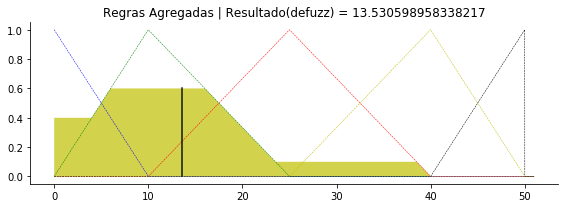

In [18]:
'''
Executando para uma entrada arbitrária
'''
sujeira = 30
mancha = 5
activations = do_activation(sujeira,mancha)
precedent_aggregations = do_precedent_aggregation(activations)
implications = do_implication(precedent_aggregations)
rule_aggregation = do_rule_aggregation(implications)
result = do_defuzzification(rule_aggregation)

print_result(rule_aggregation,result)

In [15]:
'''
Executando para varias entradas
'''
df = pd.read_table("dados.csv", sep=";")
result = []
error = []
for index, row in df.iterrows():
    sujeira = row['x1']
    mancha = row['x2']
    activations = do_activation(sujeira,mancha)
    precedent_aggregations = do_precedent_aggregation(activations)
    implications = do_implication(precedent_aggregations)
    rule_aggregation = do_rule_aggregation(implications)
    try:
        defuzz = do_defuzzification(rule_aggregation)
    except Exception:
        defuzz = -1
    result.append(defuzz)
    error.append(defuzz-rou)
#np.array(result)
df.insert(3,'result',result)


In [19]:
df

,x1,x2,y,result
0,0,0,"3,1385",3.333333
1,10,0,"8,0207",8.272727
2,20,0,"10,0138",10.197279
3,30,0,"10,9929",11.112094
4,40,0,"11,4842",11.540984
5,50,0,"11,6704",11.666667
6,60,0,"15,5819",15.577778
7,70,0,"18,2742",18.272727
8,80,0,"20,4950",20.490196
9,90,0,"22,6216",22.616162


In [22]:
df['x1']


0        0
1       10
2       20
3       30
4       40
5       50
6       60
7       70
8       80
9       90
10     100
11       0
12      10
13      20
14      30
15      40
16      50
17      60
18      70
19      80
20      90
21     100
22       0
23      10
24      20
25      30
26      40
27      50
28      60
29      70
      ... 
91      30
92      40
93      50
94      60
95      70
96      80
97      90
98     100
99       0
100     10
101     20
102     30
103     40
104     50
105     60
106     70
107     80
108     90
109    100
110      0
111     10
112     20
113     30
114     40
115     50
116     60
117     70
118     80
119     90
120    100
Name: x1, Length: 121, dtype: int64

In [21]:
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(y, y_mc, 'b', linewidth=0.5, linestyle='--', label='MC')
ax0.plot(y, y_c, 'g', linewidth=0.5, linestyle='--', label='C')